In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import warnings
warnings.filterwarnings('ignore')

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
area_dataset_dir = '/Users/jaewone/Downloads/crime_analysis_dashboard/dataset/crime_by_area'
office_dataset_dir = '/Users/jaewone/Downloads/crime_analysis_dashboard/dataset/crime_by_office'

In [5]:
file_paths = [os.path.join(office_dataset_dir, file)
              for file in os.listdir(office_dataset_dir)]

['살인' '강도' '강간' '절도' '폭력' nan]


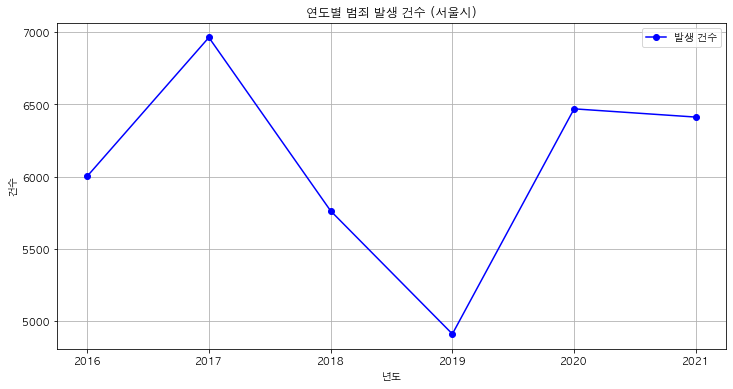

In [20]:
guilty_list = ['살인', '강도', '강간', '절도', '폭력']
guilty = guilty_list[2]

data_all_years = []

for year, file_path in zip(range(2016, 2022), file_paths):
    year_data = pd.read_csv(file_path, encoding='CP949')
    year_data['년도'] = year
    data_all_years.append(year_data)

combined_data = pd.concat(data_all_years)
relevant_columns = ['년도', '죄종', '발생검거', '건수']
combined_data = combined_data[relevant_columns]

# 죄종열에 있는 값 중 '강간,추행' 값은 '강간'으로 변경
combined_data['죄종'] = combined_data['죄종'].replace('강간,추행', '강간')
print(combined_data['죄종'].unique())

# 그룹화 및 합산
grouped_data = combined_data.groupby(
    ['년도', '죄종', '발생검거']).sum().reset_index()
occurrences = grouped_data[grouped_data['발생검거'] == '발생']
occurrences = occurrences[occurrences['죄종'] == guilty]
total_occurrences_per_year = occurrences.groupby('년도')['건수'].sum()

# 그래프 그리기
fig = plt.figure(figsize=(12, 6))
plt.plot(total_occurrences_per_year.index, total_occurrences_per_year.values,
         marker='o', color='blue', label='발생 건수')
plt.title('연도별 범죄 발생 건수 (서울시)')
plt.xlabel('년도')
plt.ylabel('건수')
plt.legend()
plt.grid(True)
plt.show()